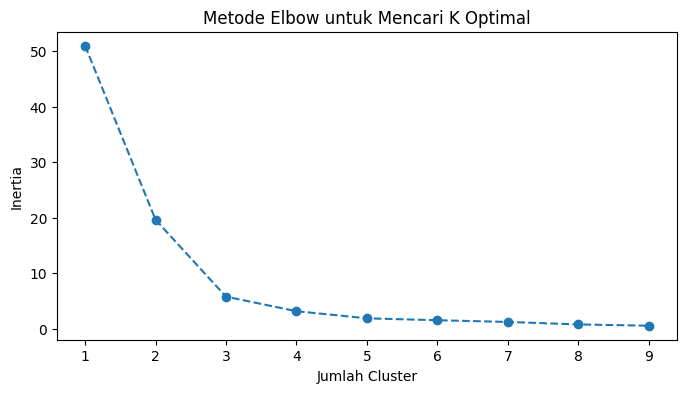


--- RATA-RATA KARAKTERISTIK PER CLUSTER ---
            Sek_24        Sis_24     Guru_24
Cluster                                     
0        17.583333   3832.416667  151.083333
1        45.000000  15404.000000  626.000000
2        30.500000   7753.250000  259.250000


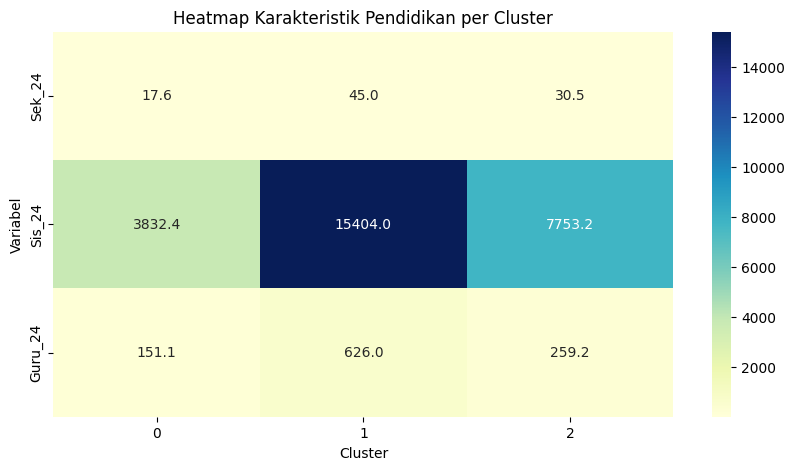

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. Load dan Persiapan Data
df = pd.read_csv('Dataset Final Sekolah Dasar Dipurwakarta.csv', sep=';', skiprows=1)
df.columns = ['Kecamatan', 'Sek_21', 'Sek_22', 'Sek_23', 'Sek_24', 
              'Sis_21', 'Sis_22', 'Sis_23', 'Sis_24', 
              'Guru_21', 'Guru_22', 'Guru_23', 'Guru_24']

# Hapus baris total jika ada
df = df[df['Kecamatan'] != 'Jumlah'].reset_index(drop=True)

# Memilih kolom numerik untuk clustering (Fokus pada tahun 2024)
numeric_cols = ['Sek_24', 'Sis_24', 'Guru_24']
X = df[numeric_cols]

# 2. Scaling Data (Standarisasi)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Menentukan Jumlah Cluster (Metode Elbow)
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o', linestyle='--')
plt.title('Metode Elbow untuk Mencari K Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()

# 4. Menjalankan K-Means dengan K=3 (Misal: Rendah, Sedang, Tinggi)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 5. Visualisasi Heatmap Karakteristik (Seperti di referensi Anda)
cluster_summary = df.groupby('Cluster')[numeric_cols].mean()

print("\n--- RATA-RATA KARAKTERISTIK PER CLUSTER ---")
print(cluster_summary)

plt.figure(figsize=(10, 5))
sns.heatmap(cluster_summary.T, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Heatmap Karakteristik Pendidikan per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Variabel')
plt.show()

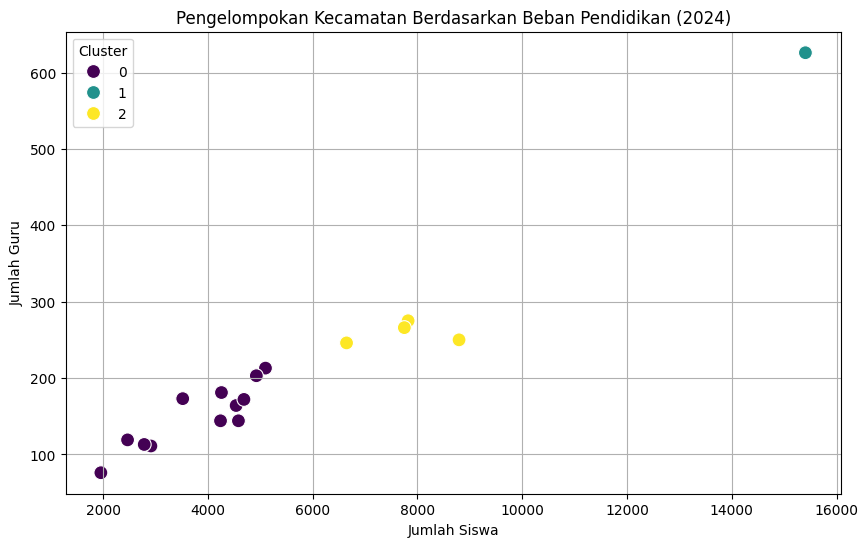

In [3]:
# Visualisasi Scatter Plot antara Jumlah Siswa dan Guru
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sis_24', y='Guru_24', hue='Cluster', palette='viridis', s=100)
plt.title('Pengelompokan Kecamatan Berdasarkan Beban Pendidikan (2024)')
plt.xlabel('Jumlah Siswa')
plt.ylabel('Jumlah Guru')
plt.grid(True)
plt.show()